In [1]:
# Nice to have and only here as a reference until moved to its instructional home :)
#export CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn; print(nvidia.cudnn.__file__)"))
#export SITE_PACKAGES_PATH=$(python -c "import site; print(site.getsitepackages()[0])")
#export LD_LIBRARY_PATH=$CUDNN_PATH/lib:$SITE_PACKAGES_PATH/tensorrt_libs/:$LD_LIBRARY_PATH

In [2]:
!conda list

# packages in environment at /home/flaniganp/mambaforge/envs/torch_exercise_5:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0                    pypi_0    pypi
bzip2                     1.0.8               

In [3]:
# The 'matplotlib.pyplot' is a collection of functions in the 'matplotlib' library that make matplotlib work like MATLAB.
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
# plots some lines in a plotting area, decorates the plot with labels, etc. 'plt' is a commonly used shorthand alias
# for 'matplotlib.pyplot'. This allows you to access matplotlib's plotting functions with shorter syntax - for example,
# you can type 'plt.plot()' instead of 'matplotlib.pyplot.plot()'. This import is essential for data visualization,
# allowing you to create a wide variety of static, animated, and interactive plots and charts in Python.
import matplotlib.pyplot as plt

# NumPy is extensively used in domains like data analysis, machine learning, scientific computing, and engineering for
# tasks such as data transformation, statistical analysis, and image processing. The 'np' alias simplifies the access to
# NumPy functions, allowing for concise and readable code.
import numpy as np

# The os module in Python provides a way of using operating system dependent functionality. It allows you to interface
# with the underlying operating system that Python is running on – be it Windows, Mac or Linux. You can use the os module
# to handle file and directory paths, create folders, list contents of a directory, manage environment variables, execute
# shell commands, and more.
import os

# A data manipulation library ideal for ML preprocessing, data cleaning, exploration, and feature engineering. 
# Supports efficient handling and analysis of large datasets, integrates well with ML libraries like Scikit-learn.
import pandas as pd

# Regular Expressions
# 1. search: This function is used to perform a search for a pattern in a string and returns a match object if the
# pattern is found, otherwise None. It's particularly useful for string pattern matching and extracting specific
# segments from text.
from re import search

# Example Usage:
# Suppose you want to capture the output of the 'ls' command in a Unix/Linux system. You can use 'check_output' like
# this:
# output = check_output(['ls', '-l'])
from subprocess import check_output

# Importing the PyTorch library, known as `torch`, a powerful and widely used open-source machine learning framework.
# PyTorch provides tools and libraries for designing, training, and deploying deep learning models with ease. It's
# particularly known for its flexibility, user-friendly interface, and dynamic computational graph that allows for
# adaptive and efficient deep learning development. By importing `torch`, you gain access to a vast range of
# functionalities for handling multi-dimensional arrays (tensors), performing complex mathematical operations,
# and utilizing GPUs for accelerated computing. This makes it an indispensable tool for both researchers and
# developers in the field of artificial intelligence.
import torch

# nn from torch: Provides the building blocks for creating neural networks, including layers, activation functions,
# and loss functions. It's a foundational module for defining and assembling neural network architectures.
import torch.nn as nn

# optim from torch: Implements various optimization algorithms for training neural networks, including SGD, Adam,
# and RMSprop. These algorithms are used to update the weights of the network during training.
import torch.optim as optim

# DataLoader and Dataset from torch.utils.data: DataLoader provides an iterable over a dataset, with support for
# batching, sampling, shuffling, and multiprocess data loading. Dataset is an abstract class for representing
# a dataset, with custom implementations required to define how data is loaded and processed.
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# This function `print_gpu_info` is designed to display detailed information about the available GPUs on the system.
# It utilizes TensorFlow's `device_lib.list_local_devices()` method to enumerate all computing devices recognized by
# TensorFlow. For each device identified as a GPU, the function extracts and prints relevant details including the GPU's
# ID, name, memory limit (converted to megabytes), and compute capability. The extraction of GPU information involves
# parsing the device's description string using regular expressions to find specific pieces of information. This
# function can be particularly useful for debugging or for setting up configurations in environments with multiple GPUs,
# ensuring that TensorFlow is utilizing the GPUs as expected.

def print_gpu_info():
    # Undocumented Method
    # https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
    # Get the list of all devices
    devices = device_lib.list_local_devices()

    for device in devices:
        if device.device_type == 'GPU':
            # Extract the physical device description
            desc = device.physical_device_desc

            # Use regular expressions to extract the required information
            gpu_id_match = search(r'device: (\d+)', desc)
            name_match = search(r'name: (.*?),', desc)
            compute_capability_match = search(r'compute capability: (\d+\.\d+)', desc)

            if gpu_id_match and name_match and compute_capability_match:
                gpu_id = gpu_id_match.group(1)
                gpu_name = name_match.group(1)
                compute_capability = compute_capability_match.group(1)

                # Convert memory limit from bytes to gigabytes and round it
                memory_limit_gb = round(device.memory_limit / (1024 ** 2))

                print(
                    f"\tGPU ID {gpu_id} --> {gpu_name} --> "
                    f"Memory Limit {memory_limit_gb} MB --> "
                    f"Compute Capability {compute_capability}")

In [5]:
# NVIDIA Driver
try:
    # Execute the nvidia-smi command and decode the output
    nvidia_smi_output = check_output("nvidia-smi", shell=True).decode()

    # Split the output into lines
    lines = nvidia_smi_output.split('\n')

    # Find the line containing the driver version
    driver_line = next((line for line in lines if "Driver Version" in line), None)

    # Extract the driver version number
    if driver_line:
        driver_version = driver_line.split('Driver Version: ')[1].split()[0]
        print("NVIDIA Driver:", driver_version)

        # Extract the maximum supported CUDA version
        cuda_version = driver_line.split('CUDA Version: ')[1].strip().replace("|", "")
        print("Maximum Supported CUDA Version:", cuda_version)
    else:
        print("NVIDIA Driver Version or CUDA Version not found.")

except Exception as e:
    print("Error fetching NVIDIA Driver Version or CUDA Version:", e)

NVIDIA Driver: 545.23.08
Maximum Supported CUDA Version: 12.3     


In [6]:
print("Software Versions:")

# CUDA
try:
    # Execute the 'nvcc --version' command and decode the output
    nvcc_output = check_output("nvcc --version", shell=True).decode()

    # Use regular expression to find the version number
    match = search(r"V(\d+\.\d+\.\d+)", nvcc_output)
    if match:
        cuda_version = match.group(1)
        print("CUDA Version", cuda_version)
        device = torch.device("cuda")
    else:
        print("CUDA Version not found")
        device = torch.device("cpu")

except CalledProcessError as e:
    print("Error executing nvcc --version:", e)

Software Versions:
CUDA Version 11.8.89


In [7]:
# Normalizes a given numerical series, scaling its values to a range between 0 and 1. The normalization is achieved by subtracting the
# minimum value of the series from each element, and then dividing the result by the range of the series (max value - min value). This 
# technique ensures that the minimum value of the series is transformed to 0, and the maximum value to 1. The function returns the 
# normalized series along with the minimum and maximum values of the original series, which can be useful for reverse normalization or for
# informational purposes.

def normalize_series(series):
    """
    Normalize a numeric series to a 0-1 range.

    Parameters:
    - series (np.array): A numpy array of numerical values to be normalized.

    Returns:
    - normalized_series (np.array): The normalized series with values between 0 and 1.
    - min_val (float): The minimum value of the original series.
    - max_val (float): The maximum value of the original series.
    """
    # Find the minimum value of the series
    min_val = np.min(series)
    
    # Find the maximum value of the series
    max_val = np.max(series)
    
    # Normalize the series using the formula (value - min) / (max - min)
    normalized_series = (series - min_val) / (max_val - min_val)
    
    return normalized_series, min_val, max_val

In [8]:
# This function creates a dataset suitable for supervised learning tasks from a sequence of input data. It transforms the input data into 
# pairs of X and y, where X is a sequence of 'past' values and y is the sequence of 'future' values immediately following X. This type of 
# dataset is particularly useful for time series forecasting, where the goal is to predict future values based on past observations.

def create_dataset(input_data, past, future):
    """
    Generates feature and target datasets for time series forecasting.

    Parameters:
    - input_data (np.array): The input time series data as a numpy array.
    - past (int): The number of past observations to use for generating the feature set.
    - future (int): The number of future observations to predict.

    Returns:
    - X (np.array): The feature dataset containing sequences of past observations.
    - y (np.array): The target dataset containing sequences of future observations to be predicted.
    """
    X, y = [], []  # Initialize empty lists for features (X) and targets (y)
    
    # Iterate through the input_data to create sequences of past and future values
    for i in range(len(input_data) - past - future + 1):
        # Append the sequence of 'past' observations to X
        X.append(input_data[i:(i + past)])
        
        # Append the sequence of 'future' observations to y
        y.append(input_data[(i + past):(i + past + future)])
    
    # Convert the lists into numpy arrays for efficient numerical computations
    return np.array(X), np.array(y)

In [9]:
# This class defines an LSTM (Long Short-Term Memory) model for time series forecasting. LSTM networks are a type of recurrent neural 
# network (RNN) that are well-suited to modeling sequences and time series data. The model consists of an LSTM layer followed by a fully 
# connected layer that maps the output of the LSTM to the desired output dimension. This model is designed to take in sequences of data 
# with a specified input dimension and predict future values with a specified output dimension.

class LSTMForecastModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        """
        Initialize the LSTMForecastModel.

        Parameters:
        - input_dim (int): The number of features in the input data.
        - hidden_dim (int): The number of features in the hidden state of the LSTM.
        - output_dim (int): The number of features in the output data, i.e., the prediction dimension.
        - num_layers (int): The number of layers in the LSTM.
        """
        super(LSTMForecastModel, self).__init__()
        self.hidden_dim = hidden_dim  # Number of features in the hidden state
        self.num_layers = num_layers  # Number of LSTM layers

        # The LSTM layer; it expects input data to be provided in batch-first format.
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # Fully connected layer that maps from hidden state space to output space
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x (Tensor): The input sequence to the LSTM model.

        Returns:
        - out (Tensor): The output of the model, which is the prediction.
        """
        # Initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_dim)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])  # Only take the output from the final timestep
        return out

In [10]:
# Trains a PyTorch model on a given dataset. It uses Mean Squared Error (MSE) as the loss function and the Adam optimizer for updating 
# model weights. Training occurs over a specified number of epochs, where each epoch consists of a training phase and a test phase.
# During the training phase, the model learns from the training dataset by minimizing the loss between its predictions and the actual 
# targets. In the test phase, the model's performance is evaluated on a separate test dataset without updating model weights, 
# providing insight into how well the model generalizes to unseen data.

def train_model(model, train_loader, test_loader, num_epochs, learning_rate):
    """
    Trains a PyTorch model and evaluates its performance on a test set.

    Parameters:
    - model: The PyTorch model to be trained.
    - train_loader: DataLoader for the training dataset.
    - test_loader: DataLoader for the test dataset.
    - num_epochs (int): The number of epochs to train the model.
    - learning_rate (float): The learning rate for the optimizer.

    Returns:
    None. Outputs the test loss at the end of each epoch.
    """
    criterion = nn.MSELoss()  # Loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizer

    model.to(device)  # Ensure the model is on the correct device

    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        model.train()  # Set model to training mode
        for inputs, targets in train_loader:  # Iterate over the training data
            inputs, targets = inputs.to(device).float(), targets.to(device).float() # Ensure data is in float format
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass: compute the output
            loss = criterion(outputs, targets)  # Calculate the loss
            loss.backward()  # Backward pass: compute the gradient
            optimizer.step()  # Optimize: update the weights
       
        # Test phase
        model.eval()  # Set model to evaluation mode
        test_loss = 0
        with torch.no_grad():  # In test phase, we don't need to compute gradients
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device).float(), targets.to(device).float()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item()  # Sum up loss value
        # Print test loss for the current epoch
        print(f'Epoch {epoch + 1}, Test Loss: {test_loss / len(test_loader)}')


In [11]:
# This function uses a trained PyTorch model to make predictions on a dataset provided via a DataLoader. It operates the model in 
# evaluation mode, which disables dropout and batch normalization layers for consistency in prediction. The function collects predictions 
# for each batch processed by the DataLoader and aggregates these predictions into a single NumPy array. This is particularly useful for 
# generating predictions in bulk after training, for tasks like forecasting, classification, or regression.

def make_predictions(model, data_loader):
    """
    Generate predictions from a trained PyTorch model using data from a DataLoader.

    Parameters:
    - model: The trained PyTorch model for which predictions are to be made.
    - data_loader: DataLoader providing the dataset on which predictions are to be made.

    Returns:
    - A NumPy array containing the model's predictions for the input data.
    """   
    model.eval()  # Set the model to evaluation mode
    predictions = []  # Initialize an empty list to store predictions
    
    with torch.no_grad():  # Disable gradient calculation to save memory and computations
        for inputs, _ in data_loader:  # Iterate over the dataset
            inputs = inputs.to(device).float()  # Move inputs to the correct device and ensure they are in float format
            outputs = model(inputs)  # Generate predictions for the current batch
            predictions.append(outputs.cpu().numpy())  # Convert predictions to NumPy array and append to list
    
    # Concatenate all batch predictions into a single NumPy array and return
    return np.concatenate(predictions)

In [12]:
# The function sets the model to evaluation mode and iterates over the test dataset, calculating predictions for each batch. It computes 
# the Mean Squared Error (MSE) for each batch by comparing the model's predictions against the actual target values. These batch-wise MSEs
# are aggregated to compute the overall MSE for the entire test dataset. Additionally, the Root Mean Squared Error (RMSE) is calculated 
# from the MSE to provide an error metric in the same units as the target variable. The function returns both MSE and RMSE, offering 
# insights into the model's prediction accuracy and the typical error magnitude.

def evaluate_regression_model(model, test_loader, device):
    """
    Evaluates the performance of a regression model on a test dataset.


    Parameters:
    - model: The PyTorch model being evaluated. This model should be a regression model,
             capable of predicting continuous values.
    - test_loader: A DataLoader object that provides batches of data from the test dataset.
                   Each batch includes a set of inputs and their corresponding target values.
    - device: A string or torch.device indicating where the computations should be performed.
              This can be 'cpu' for CPU computation or 'cuda' for GPU computation, if available.

    Returns:
    - mse: The Mean Squared Error across all batches in the test dataset, providing a measure
           of the average squared difference between the predicted values and the actual target values.
    - rmse: The Root Mean Squared Error, which is the square root of the MSE. This metric provides
            a measure of the typical prediction error magnitude in the same units as the target variable.
    """
    model.eval()  # Switches the model to evaluation mode.
    total_mse = 0.0  # Initializes the total MSE accumulator.

    with torch.no_grad():  # Disables gradient computation for efficiency.
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Moves data to the computation device.
            outputs = model(inputs).squeeze()  # Generates model predictions.
            mse = torch.nn.functional.mse_loss(outputs, labels.squeeze())  # Computes MSE for the current batch.
            total_mse += mse.item() * inputs.size(0)  # Aggregates the weighted MSE.

    avg_mse = total_mse / len(test_loader.dataset)  # Computes the average MSE across all test data.
    rmse = np.sqrt(avg_mse)  # Calculates the RMSE from the average MSE.

    return avg_mse, rmse  # Returns the MSE and RMSE metrics.


Epoch 1, Test Loss: 0.01103464230571104
Epoch 2, Test Loss: 0.010576765802081512
Epoch 3, Test Loss: 0.009632673013307478
Epoch 4, Test Loss: 0.010522127900596546
Epoch 5, Test Loss: 0.008815022428398546
Epoch 6, Test Loss: 0.008235404105938
Epoch 7, Test Loss: 0.007458534618110761
Epoch 8, Test Loss: 0.007644421663945136
Epoch 9, Test Loss: 0.007155378774294387
Epoch 10, Test Loss: 0.007874515656705784
Epoch 11, Test Loss: 0.007121461828279755
Epoch 12, Test Loss: 0.007194337556543557
Epoch 13, Test Loss: 0.007366054367436015
Epoch 14, Test Loss: 0.007597611144023097
Epoch 15, Test Loss: 0.0072265123219593715
Epoch 16, Test Loss: 0.007212948965151672
Epoch 17, Test Loss: 0.008655276351972767
Epoch 18, Test Loss: 0.007560916973844818
Epoch 19, Test Loss: 0.00751814659198989
Epoch 20, Test Loss: 0.00736228575039169


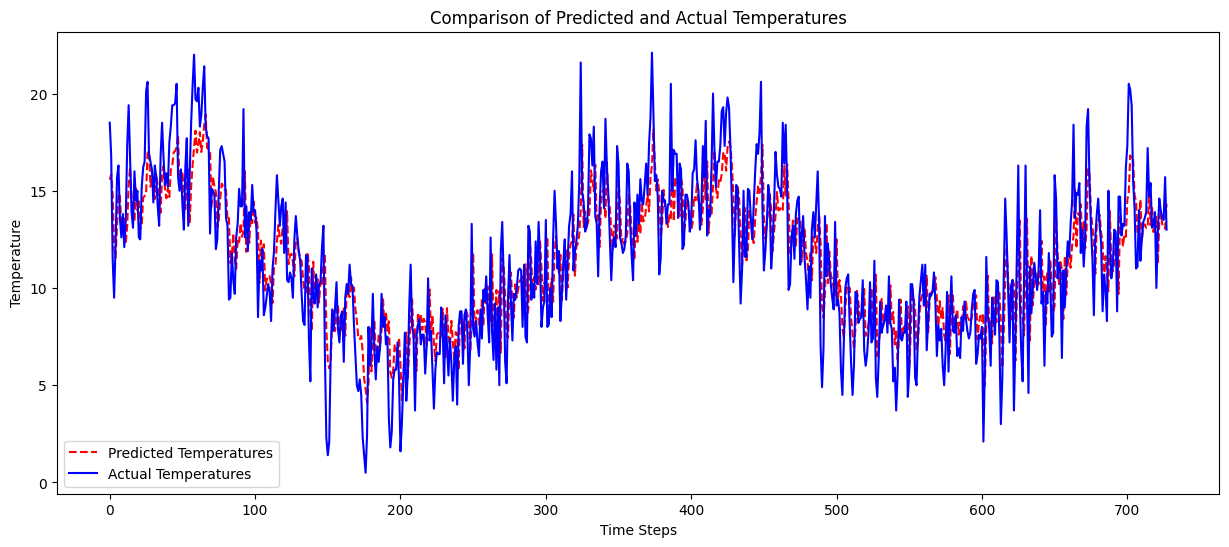

In [13]:

# This script demonstrates a complete workflow for time series forecasting using an LSTM model on temperature data.
# It starts by loading daily minimum temperatures from a CSV file hosted on GitHub. 
# The temperatures are then normalized, and the dataset is transformed into a format suitable for supervised learning.
# The transformed dataset is split into training and test sets, wrapped into PyTorch DataLoaders, 
# and then used to train an LSTM model. Finally, the script makes predictions on the test set,
# rescales these predictions back to their original temperature range, and plots them alongside the actual temperatures
# to visually compare the model's forecasts against true values.

# Load and preprocess the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')  # Load data with date parsing and indexing

temperatures = df['Temp'].values  # Extract temperature values
# Normalize temperatures to facilitate model training
normalized_temps, min_temp, max_temp = normalize_series(temperatures)

# Define parameters for the dataset creation
n_past = 10  # Number of past days to use for forecasting the future
n_future = 1  # Number of future days to forecast
batch_size = 32  # Batch size for training and test

# Create the dataset for the LSTM model
X, y = create_dataset(normalized_temps, n_past, n_future)
# Split the dataset into training and test sets (80% training, 20% test)
X_train, y_train = X[:int(len(X) * 0.8)], y[:int(len(y) * 0.8)]
X_test, y_test = X[int(len(X) * 0.8):], y[int(len(y) * 0.8):]

# Wrap the training and test sets in PyTorch TensorDatasets and DataLoader
train_data = TensorDataset(torch.from_numpy(X_train).unsqueeze(-1).float(), torch.from_numpy(y_train).float())
test_data = TensorDataset(torch.from_numpy(X_test).unsqueeze(-1).float(), torch.from_numpy(y_test).float())
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize the LSTM model with specified architecture parameters
model = LSTMForecastModel(input_dim=1, hidden_dim=100, output_dim=n_future, num_layers=2)

# Train the model on the training dataset while evaluating on the test dataset
train_model(model, train_loader, test_loader, num_epochs=20, learning_rate=0.001)

# Make predictions on the test dataset
predicted_temperatures = make_predictions(model, test_loader)
# Rescale predicted temperatures to their original range for comparison
predicted_temperatures_rescaled = predicted_temperatures * (max_temp - min_temp) + min_temp
# Rescale the test set temperatures for comparison
y_test_rescaled = y_test * (max_temp - min_temp) + min_temp

# Visualization of the predicted vs actual temperatures
plt.figure(figsize=(15, 6))
plt.plot(predicted_temperatures_rescaled.flatten(), label="Predicted Temperatures", color='red', linestyle='--')
plt.plot(y_test_rescaled.flatten(), label="Actual Temperatures", color='blue')
plt.title("Comparison of Predicted and Actual Temperatures")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [16]:
# Define the model paths
model_path = "../../models/exercise_5_model.pth"
quantized_model_path = "../../models/quantized_exercise_5_model.pth"
best_model_path = "../../models/exercise_5/best.pth"

# Extract the directory paths
model_dir = os.path.dirname(model_path)
best_model_dir = os.path.dirname(best_model_path)

# Create the directories if they do not exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(best_model_dir, exist_ok=True)

In [17]:
avg_mse, rmse = evaluate_regression_model(model, test_loader, device)

# Round the results to the nearest hundredth
avg_mse_rounded = round(avg_mse, 2)
rmse_rounded = round(rmse, 2)

# Print the rounded results
print(f"Average Mean Square Error: {avg_mse_rounded}")
print(f"Root Mean Square Error: {rmse_rounded}")

Average Mean Square Error: 0.01
Root Mean Square Error: 0.09
